# Milky Way CGM X-ray Emission Spectrum

Figure 8.3 from Chapter 8 of *Interstellar and Intergalactic Medium* by Ryden & Pogge, 2021, 
Cambridge University Press.

Plot of XMM-Newton X-ray spectrum of hot gas looking through the Milky Way's circumgalactic medium. Data are
plotted with model fits of the foreground, background, and instrumental components superimposed:
 * the emission line at 1.5 keV is a fluorescent line from aluminum within the telescope
 * Contribution of warm-hot CGM (T=2x10<sup>6</sup> K)
 * Contribution of hot CGM (T=7x10<sup>6</sup> K).
 
Data from [Das et al. 2019, ApJ, 887, 257](https://ui.adsabs.harvard.edu/abs/2019ApJ...887..257D) 
Figure 2a, provided by Sanskriti Das.

This is a large data set, contained in the `CGM/` folder that accompanies this notebook on GitHub.

In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

# OS-agnostic path handling

from pathlib import Path

# suppress nuisance warnings

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot. Fonts and resolution adopted follow CUP style.


In [3]:
figName = 'Fig8_3' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# output format and resolution

figFmt = 'png'
dpi = 600

# Graphic dimensions 

plotWidth = dpi*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = textWidth 
hInches = wInches/aspect

# Plot filename

plotFile = f'{figName}.{figFmt}'

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad'] = f'{axisPad}'
plt.rcParams['ytick.major.pad'] = f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Spectral Data

Data are in the **CGM/** folder organized by data set, in multicolumn ASCII text. There are 10 data sets in 
all that contribute as described in Das et al. 2019.


In [4]:
dataFolder = 'CGM'

dataSets = ['0761100101','0761100201','0761100301','0761100401','0761101001',
            '0790380501','0790380601','0790380801','0790381401','0790381501']

refData = '0790381401'
energy = {}
energyErr = {}
flux = {}
fluxErr = {}

for ds in dataSets:
    dataFile = str(Path(dataFolder) / ds / "pnspec.txt")
    errFile = str(Path(dataFolder) / ds / "pnspec_err.txt")
    
    data = pd.read_csv(dataFile,sep=r'\s+',header=None,skiprows=3,comment='#')
    
    energy[ds] = np.array(data[0])
    energyErr[ds] = np.array(data[1])
    flux[ds] = np.array(data[2])
    fluxErr[ds] = np.array(data[3])

    # Two galactic hot components GH1 and GH2 and instrumental component
    
    if ds==refData:
        GH1 = np.array(data[18])
        GH2 = np.array(data[19])
        Inst = np.array(data[6])
        for i in range(11):
            Inst += np.array(data[i+7])

# Plotting Limits

xMin = 0.35 # keV
xMax = 7.0

yMin = 1.e-5 # Fnu cts cm^-2 s^-1 keV^-1
yMax = 0.025 # 

## Make the plot


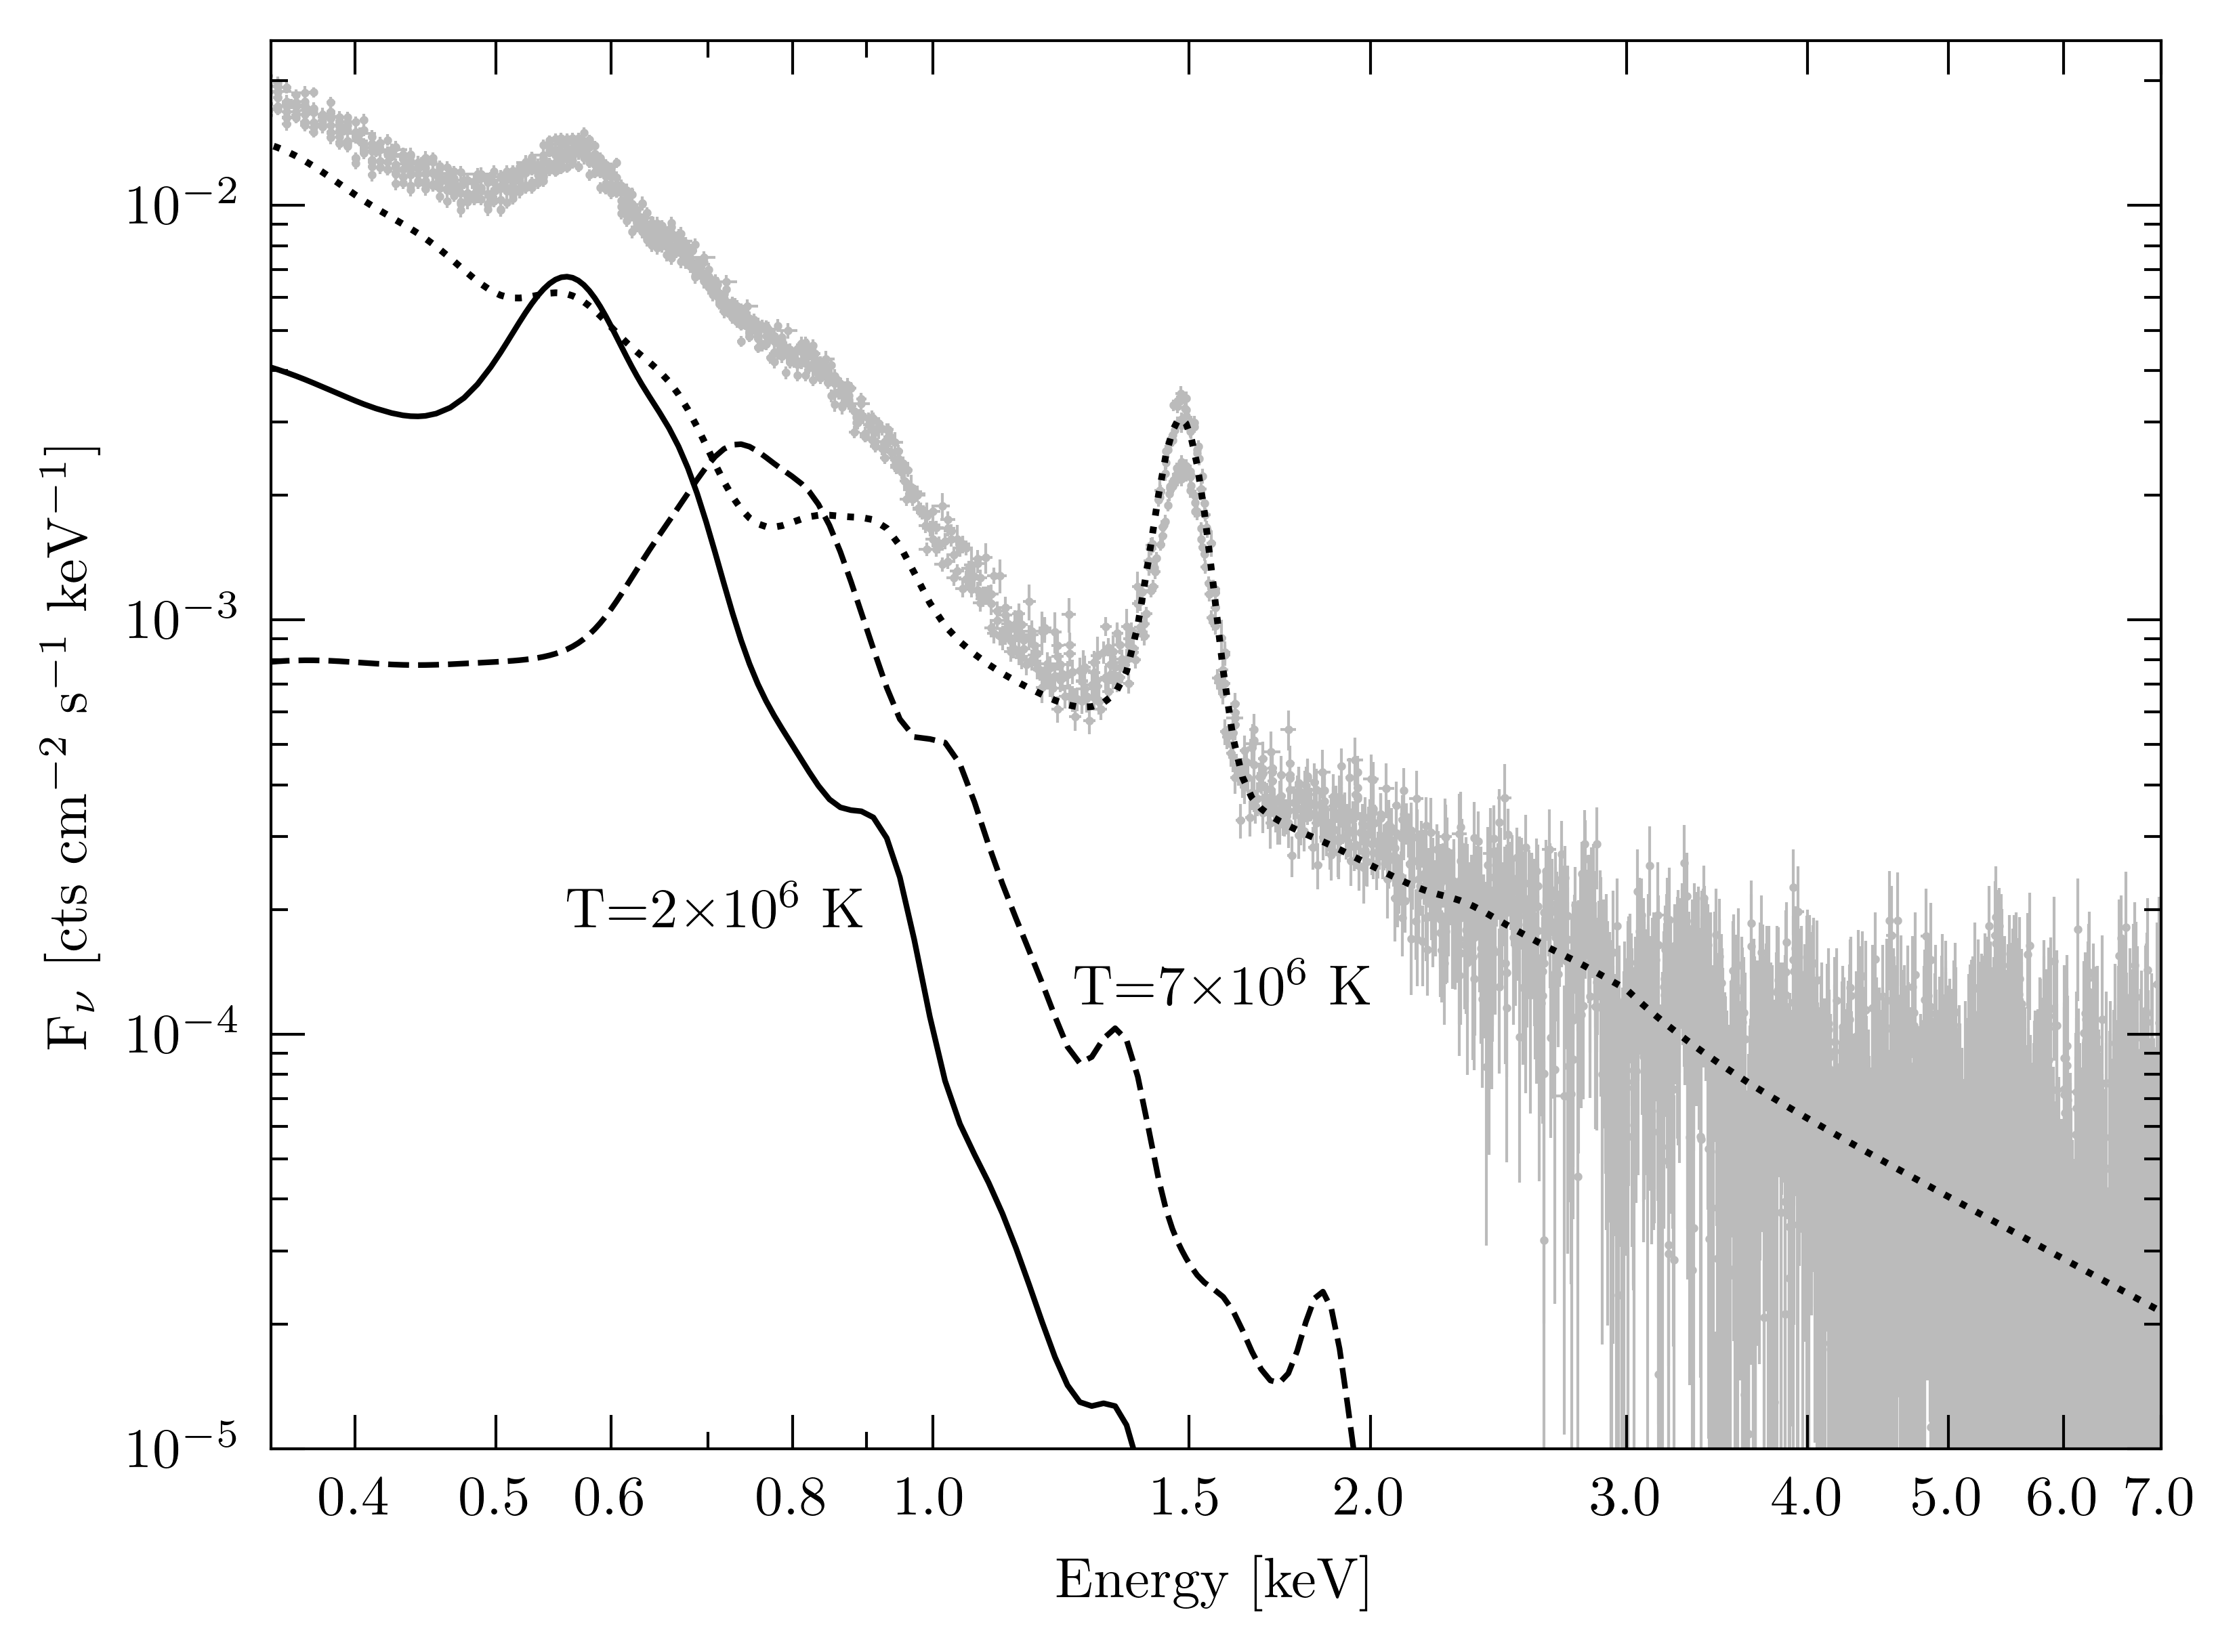

In [5]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on',zorder=10)
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on',zorder=10)

# Limits

ax.set_xlim(xMin,xMax)
ax.set_xscale('log')
ax.set_xticks([0.4,0.5,0.6,0.8,1.0,1.5,2.0,3.0,4.0,5.0,6.0,7.0])
ax.set_xticklabels(['0.4','0.5','0.6','0.8','1.0','1.5','2.0','3.0','4.0','5.0','6.0','7.0'])
ax.set_xlabel(r'Energy [keV]',fontsize=axisFontSize)

ax.set_ylim(yMin,yMax)
ax.set_yscale('log')
ax.set_ylabel(r'F$_\nu$ [cts cm$^{-2}$ s$^{-1}$ keV$^{-1}$]',fontsize=axisFontSize)

# Data in gray, z layer 1

for ds in dataSets:
    ax.errorbar(energy[ds],flux[ds],xerr=energyErr[ds],yerr=fluxErr[ds],color='#bbbbbb',fmt='.',
                mec=None,ms=1,zorder=1,lw=0.5)

# Components: WHIM, HotIGM, Instrumental

ax.plot(energy[refData],GH1,'-',color='black',lw=1,zorder=10)
ax.plot(energy[refData],GH2,'--',color='black',lw=1,zorder=10)
ax.plot(energy[refData],Inst,':',color='black',lw=1.2,zorder=9)

# Label curves

ax.text(0.9,2e-4,r'T=2$\times$10$^6$ K',ha='right',va='center',fontsize=10)
ax.text(1.25,1.3e-4,r'T=7$\times$10$^6$ K',ha='left',va='center',fontsize=10)

plt.savefig(plotFile,bbox_inches='tight',facecolor='white')

plt.show()